# Navigating the Data Science Job Market


This project aims to identify and explore the essential skills and competencies needed to land a job as a data scientist. By highlighting the most sought-after skills and competencies, this study aims to help individuals tailor their skill set to meet the demands of employers and increase their chances of landing a job in data science. My dataset covers job listings for a range of data science positions.

In [1]:
#Import necessary packages
import pandas as pd
import re
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import my first dataset 
job_postings_df = pd.read_csv("job_postings.csv")
job_postings_df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


In [3]:
# Import the second dataset
job_skills_df = pd.read_csv("job_skills.csv")
job_skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [4]:
# Merge the two datasets with the common column "job_link"
df = pd.merge(job_postings_df, job_skills_df, on="job_link")
df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [5]:
# Check for any missing values
df.isnull().sum()

job_link               0
last_processed_time    0
last_status            0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           1
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             5
dtype: int64

As there are only 6 missing datas from the 12,217 entries for job_type and job_location, I am simply going to drop the rows.

In [6]:
df.shape

(12217, 16)

In [7]:
df.dropna(how="any", inplace=True)
df.shape

(12211, 16)

In [8]:
date_range = df['first_seen'].agg(['min', 'max'])
print("Date Range for the Dataset:")
print(date_range)

Date Range for the Dataset:
min    2024-01-12
max    2024-01-17
Name: first_seen, dtype: object


So as the first step let's look at the top/most relevant skills that a data related role is supposed to have.

In [9]:
from collections import Counter
skill_count = ' '.join(df["job_skills"].astype(str).str.lower())
skills = skill_count.split(", ")
counts = Counter(skills)
print(list(counts.items())[:10])

[('machine learning', 2025), ('programming', 254), ('python', 4399), ('scala', 982), ('java', 1237), ('data engineering', 1026), ('distributed computing', 166), ('statistical modeling', 320), ('optimization', 180), ('data pipelines', 750)]


I would like to further filter it to the top 20 skills only

In [10]:
top_skills = counts.most_common(20)
for skill, count in top_skills:
    print(f"{skill}: {count}")

python: 4399
sql: 4219
communication: 2428
data analysis: 2334
data visualization: 2259
machine learning: 2025
tableau: 1644
aws: 1615
communication skills: 1606
project management: 1572
r: 1505
data modeling: 1427
spark: 1372
problem solving: 1363
data warehousing: 1316
java: 1237
data management: 1200
analytical skills: 1177
teamwork: 1171
data science: 1166


The analysis shows that Python and SQL are the most important skills for data-related roles, which is not surprising. However, it's interesting to note the emphasis on communication skills by recruiters. This suggests that being able to communicate effectively is highly valued in these roles. Overall, the top skills include Python, SQL, communication, data analysis, data visualization, machine learning, and more technical skills like AWS and Tableau. This indicates that a combination of technical and soft skills is essential for success in data-related roles.

As the next step I would like to classify the job titles to broad categories of jobs so I can get a good idea about the current job market and job postings.

In [11]:
from collections import defaultdict

# Top 10 data science and machine learning roles
data_science_ml_roles = [
    "Machine Learning Engineer",
    "Data Scientist",
    "Data Engineer",
    "AI/ML Research Scientist",
    "Data Analyst",
    "Business Intelligence Analyst",
    "Data Architect",
    "Data Warehouse Engineer",
    "Big Data Engineer"
]

# Create a dictionary to store job titles for each category
category_dict = defaultdict(list)
job_title_category_dict={}
# Function to match job title with data science/ML roles
def match_title_with_roles(title):
    matches = {}
    for role in data_science_ml_roles:
        role_lower = role.lower()
        count = sum(1 for word in role_lower.split() if word in title.lower())
        matches[role] = count
    return max(matches, key=matches.get)

df["job_category"]=df["job_title"].apply(match_title_with_roles)

# Count the number of items in each category
category_counts = df["job_category"].value_counts()
print(category_counts)

Data Scientist                   4378
Data Engineer                    2686
Data Analyst                     2528
Machine Learning Engineer        1800
Data Architect                    555
Big Data Engineer                 121
Business Intelligence Analyst      54
AI/ML Research Scientist           48
Data Warehouse Engineer            41
Name: job_category, dtype: int64


The analysis indicates that "Data Scientist" roles make up about 44% of the job listings, making them the most common. "Data Engineer" positions account for around 27%, while "Data Analyst" roles comprise about 25%. "Machine Learning Engineer" roles represent approximately 18%, and "Data Architect" roles make up about 5%. Other roles like "Big Data Engineer," "Business Intelligence Analyst," and "AI/ML Research Scientist" are less common, each making up a smaller percentage of the job listings, indicating a more specialized demand in the job market.

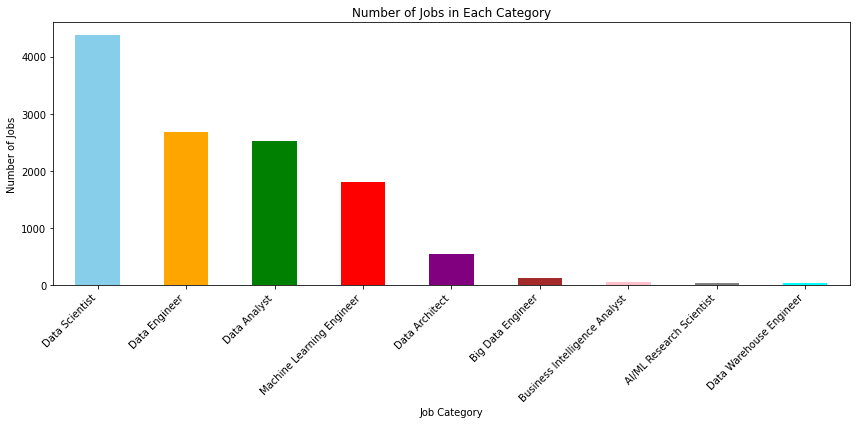

In [12]:
# Create a bar chart to visualize the counts
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", color=colors)
plt.xlabel("Job Category")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs in Each Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

I've focused solely on identifying the top three skills required for the various job categories mentioned above. I achieved this by extracting and tallying the skills for each job category, then presenting the top three skills as a comma-separated string. This was done by grouping the data by job category and applying the function to obtain the top three skills for each category. The result is a DataFrame displaying job categories alongside their top three skills.

In [13]:
# Function to get top three skills for each job category
def get_top_three_skills(group):
    skills = group.str.cat(sep=',').split(',')
    skills_count = pd.Series(skills).value_counts()
    return list(skills_count.head(3).index)

# Group by job category and apply the function to get top three skills
top_three_skills = df.groupby('job_category')['job_skills'].apply(get_top_three_skills).reset_index()

# Rename the column
top_three_skills.columns = ['job_category', 'top_three_skills']

print(top_three_skills)

                    job_category                              top_three_skills
0       AI/ML Research Scientist  [ Python,  Machine Learning,  Communication]
1              Big Data Engineer                    [ Spark,  Python,  Hadoop]
2  Business Intelligence Analyst        [ Power BI,  Data Visualization,  SQL]
3                   Data Analyst                     [ SQL,  Python,  Tableau]
4                 Data Architect               [ SQL,  Python,  Data Modeling]
5                  Data Engineer                         [ Python,  SQL,  AWS]
6                 Data Scientist               [ SQL,  Python,  Communication]
7        Data Warehouse Engineer                     [ SQL,  SQL Server,  ETL]
8      Machine Learning Engineer         [ Python, Machine Learning,  PyTorch]


The analysis reveals key skills for various data science and machine learning roles, offering insights into areas where I may need improvement. I am particularly drawn to roles like Data Scientist, Data Analyst, and Business Intelligence Analyst because they align closely with my existing skill set and career aspirations. So, I am going to further filter the job posting to include only roles in those categories

In [14]:
interested_roles_df = df[df['job_category'].isin(['Data Analyst', 'Data Scientist', 'Business Intelligence Analyst'])]
interested_roles_df.head()
# interested_roles_df.shape

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_category
8,https://www.linkedin.com/jobs/view/senior-fina...,2024-01-21 07:14:50.991803+00,Finished NER,t,t,f,Senior Financial Data Analyst,The Walt Disney Company,"Lake Buena Vista, FL",2024-01-15,Avondale,United States,Budget Officer,Mid senior,Onsite,"Problem solving, Data analysis, Predictive ana...",Data Analyst
10,https://www.linkedin.com/jobs/view/sr-workforc...,2024-01-21 07:15:01.601597+00,Finished NER,t,t,f,Sr. Workforce Management Data Analyst,"Wisemen Multimedia, LLC","Atlanta, GA",2024-01-13,Stockbridge,United States,Management Analyst,Mid senior,Onsite,"SQL, Database Administration, Advanced Statist...",Data Analyst
11,https://www.linkedin.com/jobs/view/master-data...,2024-01-20 07:01:01.408401+00,Finished NER,t,t,f,Master Data Management - Data/Process Analyst,OpenText,"Pasadena, CA",2024-01-15,West Covina,United States,Actuary,Mid senior,Onsite,"Master Data Analyst, Data/Master Data Experien...",Data Analyst
13,https://www.linkedin.com/jobs/view/sr-database...,2024-01-21 07:45:17.879848+00,Finished NER,t,t,f,Sr. Database Administrator,Dice,"Yorba Linda, CA",2024-01-14,Irvine,United States,Data Base Administrator,Mid senior,Onsite,"SQL, AWS, DBA case tools, SQL Server, SQL prog...",Data Scientist
16,https://ca.linkedin.com/jobs/view/data-analyst...,2024-01-21 00:27:40.684771+00,Finished NER,t,t,f,Data Analyst Part Time,Toyandsons,"Waterloo, Ontario, Canada",2024-01-14,Stratford,Canada,Data Entry Clerk,Mid senior,Onsite,"Data Analysis, Data Visualization, Statistical...",Data Analyst


Out of the total 6960 listings for roles I'm interested in, the dataset includes two job levels: "Mid Senior" and "Associate." Since I'm seeking my first job after graduation, I'm focusing solely on Associate-level positions.

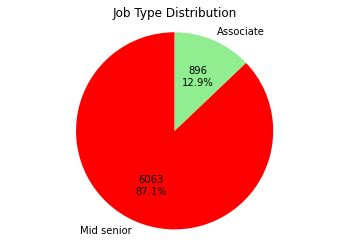

In [15]:
interested_roles_df["job_level"].unique()
job_level_counts = interested_roles_df['job_level'].value_counts()
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{absolute}\n{pct:.1f}%"

job_level_counts.plot(kind='pie', autopct=lambda pct: func(pct, job_level_counts), startangle=90, colors=['red', 'lightgreen'])
plt.axis('equal') 
plt.title('Job Type Distribution')
plt.ylabel('')
plt.show()

In the final selection process, I am specifically targeting job opportunities in California and remote positions. This choice is driven by my current location in California and my preference to avoid relocation.

In [16]:
final_df = interested_roles_df[(interested_roles_df['job_level'] == 'Associate')]
final_df = final_df[(final_df['job_location'].str.lower().str.endswith('ca')) | (final_df['job_location'].str.lower().str.contains("california"))]
remote_df = interested_roles_df[(interested_roles_df["job_type"]=="Remote")]

In [17]:
my_job_options = pd.concat([final_df, remote_df])
my_job_options.reset_index(drop=True, inplace=True)
display(my_job_options)

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_category
0,https://www.linkedin.com/jobs/view/ra-qa-post-...,2024-01-19 12:33:06.398315+00,Finished NER,t,t,f,RA/QA Post Market Data Analyst,"Amick Brown - SAP, Cloud Technologies and Busi...","California, United States",2024-01-14,California,United States,Job Analyst,Associate,Onsite,"Data Analytics, SQL, Tableau, Data Visualizati...",Data Analyst
1,https://www.linkedin.com/jobs/view/clinical-da...,2024-01-20 03:19:13.697642+00,Finished NER,t,t,f,Clinical Data Analyst/Coordinator,LVIS,"Palo Alto, CA",2024-01-16,Redwood City,United States,Mathematician,Associate,Onsite,"Clinical data management, Data integrity, Data...",Data Analyst
2,https://www.linkedin.com/jobs/view/data-analys...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Data Analyst III,WinMax,"Cupertino, CA",2024-01-13,Santa Clara,United States,Consultant Education,Associate,Onsite,"Data analysis, Attention to detail, Multitaski...",Data Analyst
3,https://www.linkedin.com/jobs/view/data-analys...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Data Analyst,Kforce Inc,"Pleasanton, CA",2024-01-13,Santa Clara,United States,Data Entry Clerk,Associate,Onsite,"Power BI, SQL, Data Visualization, Business In...",Data Analyst
4,https://www.linkedin.com/jobs/view/bi-data-ana...,2024-01-19 12:52:02.544682+00,Finished NER,t,t,f,BI Data Analyst,"Amick Brown - SAP, Cloud Technologies and Busi...","California, United States",2024-01-14,Lawton,United States,Starter,Associate,Onsite,"Data Analytics, Tableau, SQL, Python, Programm...",Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,https://www.linkedin.com/jobs/view/clinical-da...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Clinical Data Abstractor - VQI - Part Time,Carta Healthcare,United States,2024-01-12,Hollywood,United States,Abstractor,Associate,Remote,"VQI Registry Abstraction, EMR, Medical Termino...",Data Scientist
112,https://www.linkedin.com/jobs/view/clinical-da...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Clinical Data Abstractor - NSQIP - Part Time,Carta Healthcare,United States,2024-01-12,Hollywood,United States,Abstractor,Associate,Remote,"NSQIP Registry Abstraction, SCR certification,...",Data Scientist
113,https://uk.linkedin.com/jobs/view/enterprise-s...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Enterprise Sales Executive - SaaS ; AI ; ML ; ...,Space Executive,"Reading, England, United Kingdom",2024-01-12,Oxford,United Kingdom,Account Executive,Mid senior,Remote,"Enterprise Sales, AI, Machine Learning, Genera...",Business Intelligence Analyst
114,https://www.linkedin.com/jobs/view/enterprise-...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,"Enterprise Account Executive, Data Integrations",insightsoftware,"Raleigh, NC",2024-01-12,North Carolina,United States,Account Executive,Mid senior,Remote,"Sales, Business Intelligence & Visual Analytic...",Data Scientist


Out of the 12,211 job listings posted from January 12th to January 17th, 2024 (over 6 days), only 116 listings are relevant to my qualifications and my geo-location. This outcome is quite disappointing, especially considering the current job market conditions.

KEY FINDINGS:

1. Python and sql are the most popular skills that a recruiter expects for data related roles.
2. Interesting find is recruiters are emphasising on having good communication skills as it comes in the third most sought-out skill.
3. "Data Scientist" roles make up about 44% of the job listings (most wanted). 
4. Some data science positions require cloud certification, such as AWS. 
5. Considerably associate level roles only account to 12.9% compared to to Mid senior which accounts for 87.1%. This could possibly be due to the current market conditions.

CONCLUSION:

While I did reach a conclusion, I would have liked to delve deeper into the trends in salary offers and also investigate any changes in the volume of job postings over time if I had access to more data. 
